In [3]:
import pandas as pd
import numpy as np
# Archivo de humedad
hum_raw = pd.read_csv("HUMEDAD csv.csv", encoding='latin1')

# Archivo de temperatura (lo leeremos luego)
temp_raw = pd.read_csv("Datos_temperatura.csv", encoding='latin1')

In [4]:
# 1. Separar la única columna usando ';'
hum_split = hum_raw.iloc[:,0].str.split(";", expand=True)

# 2. Quitar las primeras filas basura
hum_clean = hum_split.iloc[3:].reset_index(drop=True)

# 3. Crear nombres correctos (24 columnas)
columnas = []
for dia in range(1, 5):            # Día 1 al Día 4
    for medicion in range(1, 3):   # Medición 1 y 2
        columnas += [
            f"AO_dia{dia}_m{medicion}",
            f"Humedad_dia{dia}_m{medicion}",
            f"Estado_dia{dia}_m{medicion}"
        ]

# Asignamos columnas
hum_clean.columns = columnas

# 4. Convertir números
for col in hum_clean.columns:
    if "AO" in col or "Humedad" in col:
        hum_clean[col] = pd.to_numeric(hum_clean[col], errors='coerce')

print("Columnas correctamente asignadas:")
print(hum_clean.head())

Columnas correctamente asignadas:
   AO_dia1_m1  Humedad_dia1_m1 Estado_dia1_m1  AO_dia1_m2  Humedad_dia1_m2  \
0       307.0            66.26          MEDIO       283.0            73.21   
1       308.0            65.97          MEDIO       285.0            72.63   
2       308.0            65.97          MEDIO       286.0            72.34   
3       308.0            65.97          MEDIO       286.0            72.34   
4       308.0            65.97          MEDIO       286.0            72.34   

  Estado_dia1_m2  AO_dia2_m1  Humedad_dia2_m1 Estado_dia2_m1  AO_dia2_m2  ...  \
0          MEDIO       125.0           118.97         EXCESO       207.0  ...   
1          MEDIO       133.0           116.65         EXCESO       208.0  ...   
2          MEDIO       140.0           114.63         EXCESO       211.0  ...   
3          MEDIO       146.0           112.89         EXCESO       213.0  ...   
4          MEDIO       152.0           111.15         EXCESO       214.0  ...   

   Estado_

In [5]:
promedios = {}

for dia in range(1, 5):

    # Columnas de AO y humedad pertenecientes a este día
    AO_cols = [f"AO_dia{dia}_m1", f"AO_dia{dia}_m2"]
    H_cols  = [f"Humedad_dia{dia}_m1", f"Humedad_dia{dia}_m2"]
    E_cols  = [f"Estado_dia{dia}_m1", f"Estado_dia{dia}_m2"]

    # Promedios numéricos
    AO_prom = hum_clean[AO_cols].mean(axis=1).mean()
    Hum_prom = hum_clean[H_cols].mean(axis=1).mean()

    # Moda para Estado
    estado_prom = hum_clean[E_cols].mode(axis=1)[0]

    promedios[f"Dia {dia}"] = {
        "Promedio_AO": AO_prom,
        "Promedio_Humedad": Hum_prom,
        "Estado_mas_frecuente": estado_prom
    }

promedios_df = pd.DataFrame(promedios).T
print("\nPROMEDIOS POR DÍA:")
print(promedios_df)


PROMEDIOS POR DÍA:
      Promedio_AO Promedio_Humedad  \
Dia 1  311.968665        64.823256   
Dia 2  274.710602         75.61384   
Dia 3  326.442928         60.63036   
Dia 4  311.192623        65.048156   

                                    Estado_mas_frecuente  
Dia 1  0      MEDIO
1      MEDIO
2      MEDIO
3      ...  
Dia 2  0      EXCESO
1      EXCESO
2      EXCESO
3   ...  
Dia 3  0      EXCESO
1      EXCESO
2      EXCESO
3   ...  
Dia 4  0      OPTIMO
1      OPTIMO
2      OPTIMO
3   ...  


In [6]:
temp_split = temp_raw.iloc[:,0].str.split(";", expand=True)

In [7]:
#Para renombrar las columnas
temp_split.columns = ["dia", "medicion", "temperatura"]

In [8]:
temp_split["dia"] = pd.to_numeric(temp_split["dia"])
temp_split["medicion"] = pd.to_numeric(temp_split["medicion"])
temp_split["temperatura"] = pd.to_numeric(temp_split["temperatura"])
print("Tabla de temperatura organizada:")
print(temp_split.head())
temp_clean = temp_split

Tabla de temperatura organizada:
   dia  medicion  temperatura
0    1         1           17
1    1         2           19
2    2         1           17
3    2         2           18
4    3         1           17


In [9]:
#Con base en los datos promediados y la lectura de la tabla de Tem...
#grafica para promedio de temperatiras por día
temp_prom = temp_clean.groupby("dia")["temperatura"].mean().reset_index()
temp_prom.columns = ["dia", "temp_promedio"]

print(temp_prom)

   dia  temp_promedio
0    1           18.0
1    2           17.5
2    3           17.5
3    4           17.5


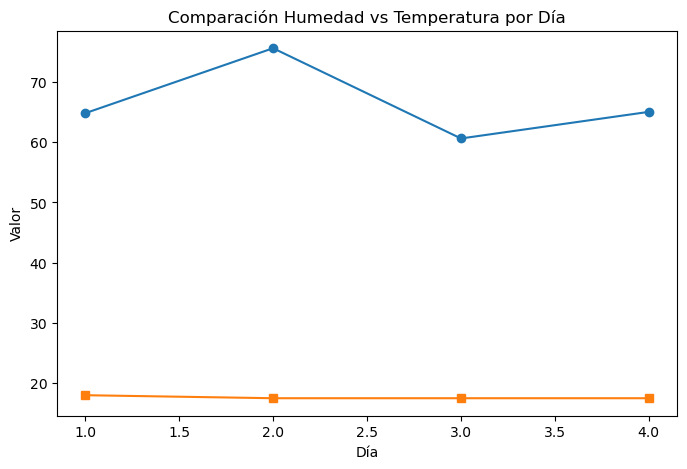

In [10]:
#En la gráfica 1 se esta mostrando un hum_prom vs Temp
import matplotlib.pyplot as plt

dias = [1,2,3,4]
hum = promedios_df["Promedio_Humedad"]
temp = temp_prom["temp_promedio"]

plt.figure(figsize=(8,5))
plt.plot(dias, hum, marker='o', label="Humedad promedio (%)")
plt.plot(dias, temp, marker='s', label="Temperatura promedio (°C)")

plt.xlabel("Día")
plt.ylabel("Valor")
plt.title("Comparación Humedad vs Temperatura por Día")
plt.show()

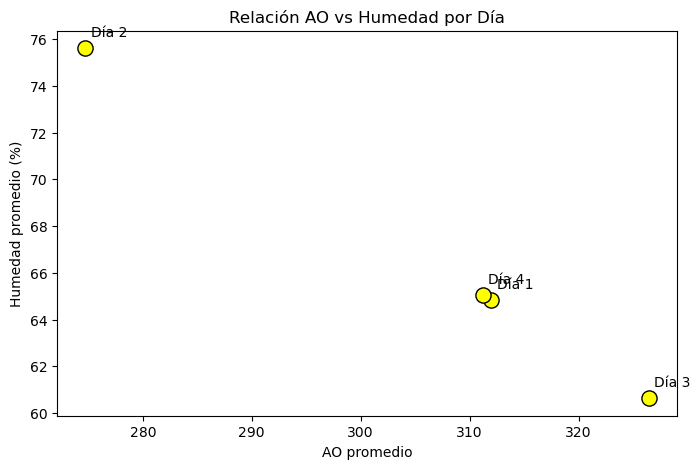

In [11]:
#Gráfica para comparar el Ao vs hum
AO = promedios_df["Promedio_AO"]
hum = promedios_df["Promedio_Humedad"]

plt.figure(figsize=(8,5))

plt.scatter(AO, hum, s=120, facecolors="yellow", edgecolors="black")

for i, dia in enumerate([1,2,3,4]):
    plt.text(AO.iloc[i] + 0.5, hum.iloc[i] + 0.5, f"Día {dia}")

plt.xlabel("AO promedio")
plt.ylabel("Humedad promedio (%)")
plt.title("Relación AO vs Humedad por Día")

plt.show()

In [12]:
promedios = {}

for dia in range(1, 5):

    # Columnas AO, humedad y estado para este día
    AO_cols = [f"AO_dia{dia}_m1", f"AO_dia{dia}_m2"]
    H_cols  = [f"Humedad_dia{dia}_m1", f"Humedad_dia{dia}_m2"]
    E_cols  = [f"Estado_dia{dia}_m1", f"Estado_dia{dia}_m2"]

    # Promedio AO y Humedad (promedio por fila y luego promedio general)
    AO_prom = hum_clean[AO_cols].mean(axis=1).mean()
    Hum_prom = hum_clean[H_cols].mean(axis=1).mean()

    # Estado más frecuente del día → ¡LA PARTE IMPORTANTE!
    estados = list(hum_clean[E_cols[0]]) + list(hum_clean[E_cols[1]])
    estado_prom = pd.Series(estados).mode()[0]

    promedios[f"Dia {dia}"] = {
        "Promedio_AO": AO_prom,
        "Promedio_Humedad": Hum_prom,
        "Estado_mas_frecuente": estado_prom
    }

promedios_df = pd.DataFrame(promedios).T

print("\nPROMEDIOS POR DÍA:")
print(promedios_df)



PROMEDIOS POR DÍA:
      Promedio_AO Promedio_Humedad Estado_mas_frecuente
Dia 1  311.968665        64.823256                 SECO
Dia 2  274.710602         75.61384                MEDIO
Dia 3  326.442928         60.63036                 SECO
Dia 4  311.192623        65.048156                 SECO


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


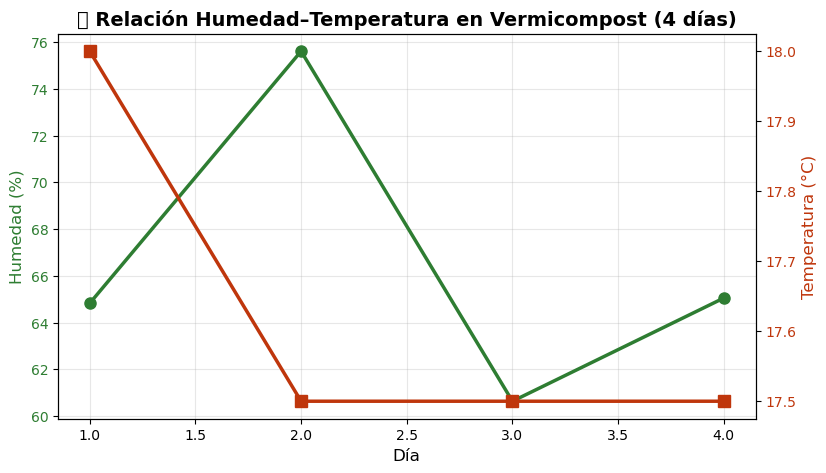

In [13]:
import matplotlib.pyplot as plt

dias = [1,2,3,4]
hum = promedios_df["Promedio_Humedad"]
temp = temp_prom["temp_promedio"]

# Crear figura
fig, ax1 = plt.subplots(figsize=(9,5))

# --- EJE 1: Humedad (color verde) ---
ax1.plot(dias, hum, marker='o', linewidth=2.5, markersize=8,
         color='#2E7D32', label="Humedad promedio (%)")
ax1.set_xlabel("Día", fontsize=12)
ax1.set_ylabel("Humedad (%)", color='#2E7D32', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#2E7D32')

# --- EJE 2: Temperatura (color café/ámbar) ---
ax2 = ax1.twinx()
ax2.plot(dias, temp, marker='s', linewidth=2.5, markersize=8,
         color='#BF360C', label="Temperatura promedio (°C)")
ax2.set_ylabel("Temperatura (°C)", color='#BF360C', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#BF360C')

# Título ambiental
plt.title("📉 Relación Humedad–Temperatura en Vermicompost (4 días)",
          fontsize=14, fontweight='bold')

# Líneas guía
ax1.grid(alpha=0.3)

plt.show()


In [14]:
hum_long.head()
print(hum_long.columns)


NameError: name 'hum_long' is not defined

In [15]:
hum_clean.head()
print(hum_clean.columns)
hum_long

Index(['AO_dia1_m1', 'Humedad_dia1_m1', 'Estado_dia1_m1', 'AO_dia1_m2',
       'Humedad_dia1_m2', 'Estado_dia1_m2', 'AO_dia2_m1', 'Humedad_dia2_m1',
       'Estado_dia2_m1', 'AO_dia2_m2', 'Humedad_dia2_m2', 'Estado_dia2_m2',
       'AO_dia3_m1', 'Humedad_dia3_m1', 'Estado_dia3_m1', 'AO_dia3_m2',
       'Humedad_dia3_m2', 'Estado_dia3_m2', 'AO_dia4_m1', 'Humedad_dia4_m1',
       'Estado_dia4_m1', 'AO_dia4_m2', 'Humedad_dia4_m2', 'Estado_dia4_m2'],
      dtype='object')


NameError: name 'hum_long' is not defined

In [16]:
hum_long = pd.DataFrame()

for dia in range(1, 5):      # Días 1–4
    for m in range(1, 3):    # Mediciones 1–2
        temp = hum_clean[[f"AO_dia{dia}_m{m}",
                          f"Humedad_dia{dia}_m{m}",
                          f"Estado_dia{dia}_m{m}"]].copy()

        temp.columns = ["AO", "Humedad", "Estado"]
        temp["Día"] = dia
        temp["Medición"] = m

        hum_long = pd.concat([hum_long, temp], ignore_index=True)

hum_long.head()


,AO,Humedad,Estado,Día,Medición
0,307.0,66.26,MEDIO,1,1
1,308.0,65.97,MEDIO,1,1
2,308.0,65.97,MEDIO,1,1
3,308.0,65.97,MEDIO,1,1
4,308.0,65.97,MEDIO,1,1


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


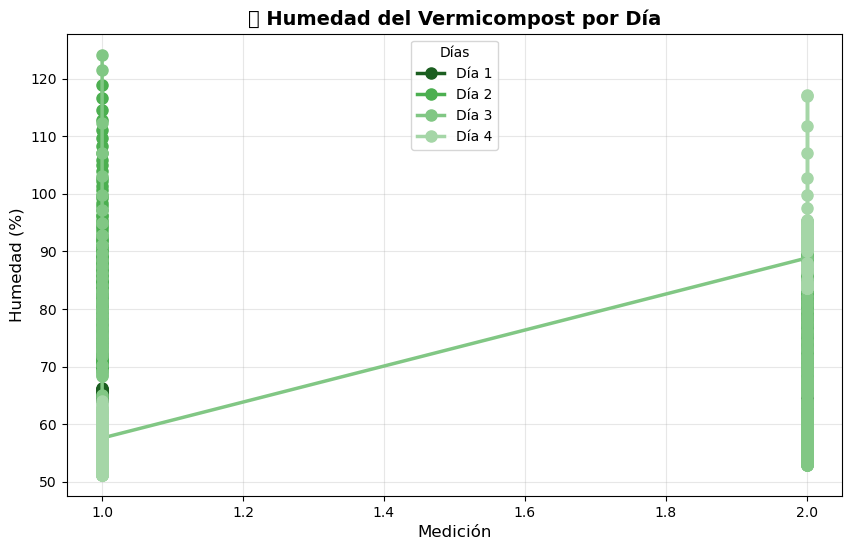

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Colores ambientales
colores = {
    1: "#1B5E20",  # Verde oscuro
    2: "#4CAF50",  # Verde medio
    3: "#81C784",  # Verde claro
    4: "#A5D6A7"   # Verde pastel
}

for dia in hum_long["Día"].unique():
    datos_dia = hum_long[hum_long["Día"] == dia]
    plt.plot(
        datos_dia["Medición"],
        datos_dia["Humedad"],
        marker="o",
        linewidth=2.5,
        markersize=8,
        label=f"Día {dia}",
        color=colores[dia]
    )

plt.title("📊 Humedad del Vermicompost por Día", fontsize=14, fontweight='bold')
plt.xlabel("Medición", fontsize=12)
plt.ylabel("Humedad (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="Días")
plt.show()


In [25]:
hum_long["Estado"] = hum_long["Estado"].astype(str).str.strip().str.upper()


In [26]:
estados_validos = ["SECO", "MEDIO", "OPTIMO", "EXCESO"]

hum_long.loc[~hum_long["Estado"].isin(estados_validos), "Estado"] = "DESCONOCIDO"


In [28]:
colores_estado = {
    "SECO": "red",
    "MEDIO": "orange",
    "OPTIMO": "green",
    "EXCESO": "white",
    "DESCONOCIDO": "gray"
}


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


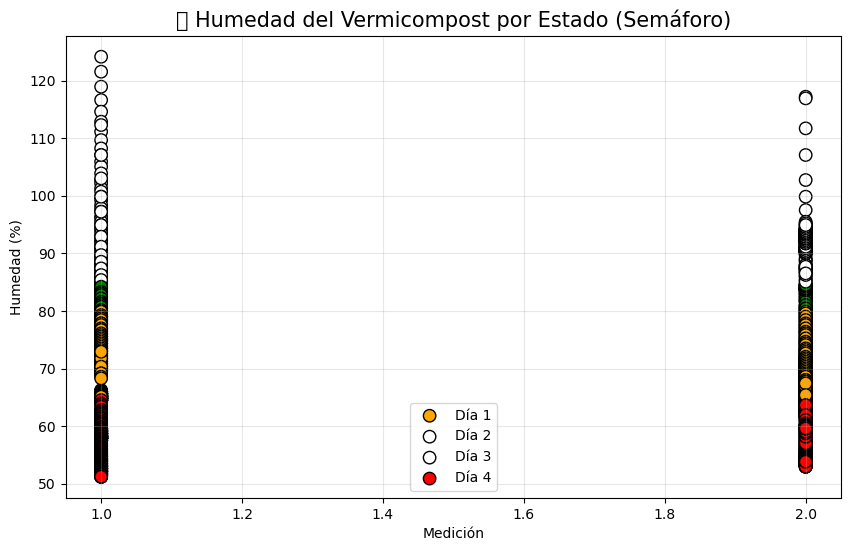

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for dia in hum_long["Día"].unique():
    datos_dia = hum_long[hum_long["Día"] == dia]

    plt.scatter(
        datos_dia["Medición"],
        datos_dia["Humedad"],
        c=datos_dia["Estado"].map(colores_estado),
        s=80,
        edgecolors="black",
        label=f"Día {dia}"
    )

plt.title("🌡️ Humedad del Vermicompost por Estado (Semáforo)", fontsize=15)
plt.xlabel("Medición")
plt.ylabel("Humedad (%)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear tabla para el mapa de calor
heatmap_data = hum_long.pivot_table(
    values="Humedad",
    index="Medición",
    columns="Día",
    aggfunc="mean"
)

heatmap_data


Día,1,2,3,4
Medición,,,,
1,65.067248,78.522622,62.036452,54.618798
2,64.579264,73.452894,59.377425,91.828186


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


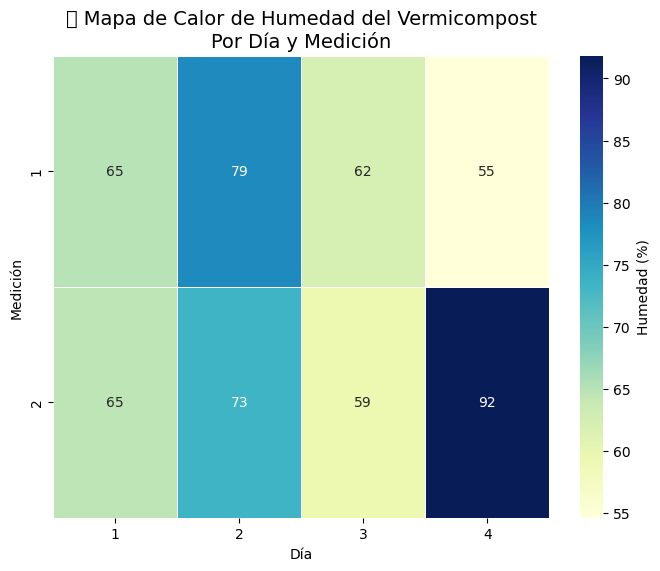

In [31]:
plt.figure(figsize=(8,6))

sns.heatmap(
    heatmap_data,
    annot=True,          # Mostrar los valores
    cmap="YlGnBu",       # Paleta verde-azul ambiental
    cbar_kws={'label': 'Humedad (%)'}, 
    linewidths=.5
)

plt.title("🌡️ Mapa de Calor de Humedad del Vermicompost\nPor Día y Medición", fontsize=14)
plt.xlabel("Día")
plt.ylabel("Medición")
plt.show()


In [45]:
# Eliminar filas donde AO o Humedad sean NaN
hum_clean = hum_long.dropna(subset=["AO", "Humedad", "Estado"])


In [46]:
X = hum_clean[["AO", "Humedad"]].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(hum_clean["Estado"])


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)


KNeighborsClassifier()

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


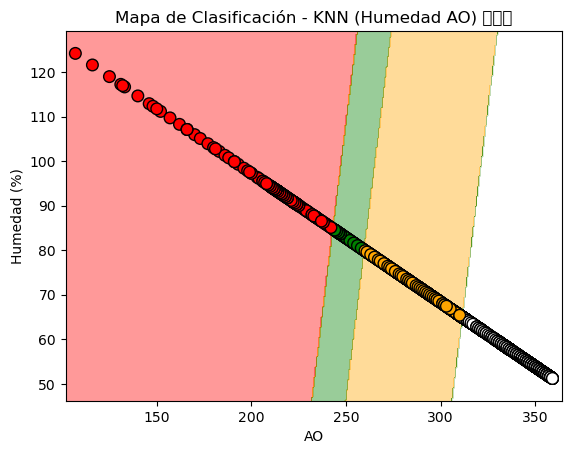

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Crear malla de puntos
x_min, x_max = X[:,0].min() - 5, X[:,0].max() + 5
y_min, y_max = X[:,1].min() - 5, X[:,1].max() + 5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

# Predecir en cada punto de la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colores semáforo
cmap = plt.matplotlib.colors.ListedColormap(["red", "orange", "green", "white"])

# Dibujar mapa de calor (fondo)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

# Dibujar puntos reales
plt.scatter(
    X[:,0],
    X[:,1],
    c=y,
    cmap=cmap,
    edgecolor="black",
    s=70
)

plt.title("Mapa de Clasificación - KNN (Humedad AO) 🟢🟠🔴")
plt.xlabel("AO")
plt.ylabel("Humedad (%)")
plt.show()
